In [1]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Path to your file
file_path = '/content/drive/MyDrive/DATA245-Machine-Learning-Group(3)/ML_Project/email_job_scam_cleaned.csv'

# Read the CSV file
df = pd.read_csv(file_path)

Mounted at /content/drive


In [5]:
df = pd.read_csv(file_path)
df = df.drop(columns=['job_id'])

In [6]:
df.head()

,title,location,department,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,is_scam,has_links_without_https,Identity_details_asked,average_days_between_interview_and_job_offer,avg_no_of_time_sensitive_details,avg_no_of_baity_phrases
0,Marketing Intern,"US, NY, New York",Marketing,Not Specified,0,1,0,Other,Internship,Not Specified,Not Specified,Marketing,0,0.0,0.0,30.824035,-0.100992,0.306755
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,Not Specified,0,1,0,Full-time,Not Applicable,Not Specified,Marketing and Advertising,Customer Service,0,0.0,0.0,26.821787,5.957187,0.488798
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Unknown,Not Specified,0,1,0,Not Specified,Not Specified,Not Specified,Not Specified,Not Specified,0,0.0,1.0,27.440842,5.285345,0.890709
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Not Specified,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,0.0,0.0,44.388317,1.017005,0.122852
4,Bill Review Manager,"US, FL, Fort Worth",Unknown,Not Specified,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,0.0,0.0,20.342851,1.174334,0.245058



Model Evaluation:
Accuracy: 0.9627143922445935

Confusion Matrix:
[[4962   37]
 [ 163  202]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4999
           1       0.85      0.55      0.67       365

    accuracy                           0.96      5364
   macro avg       0.91      0.77      0.82      5364
weighted avg       0.96      0.96      0.96      5364



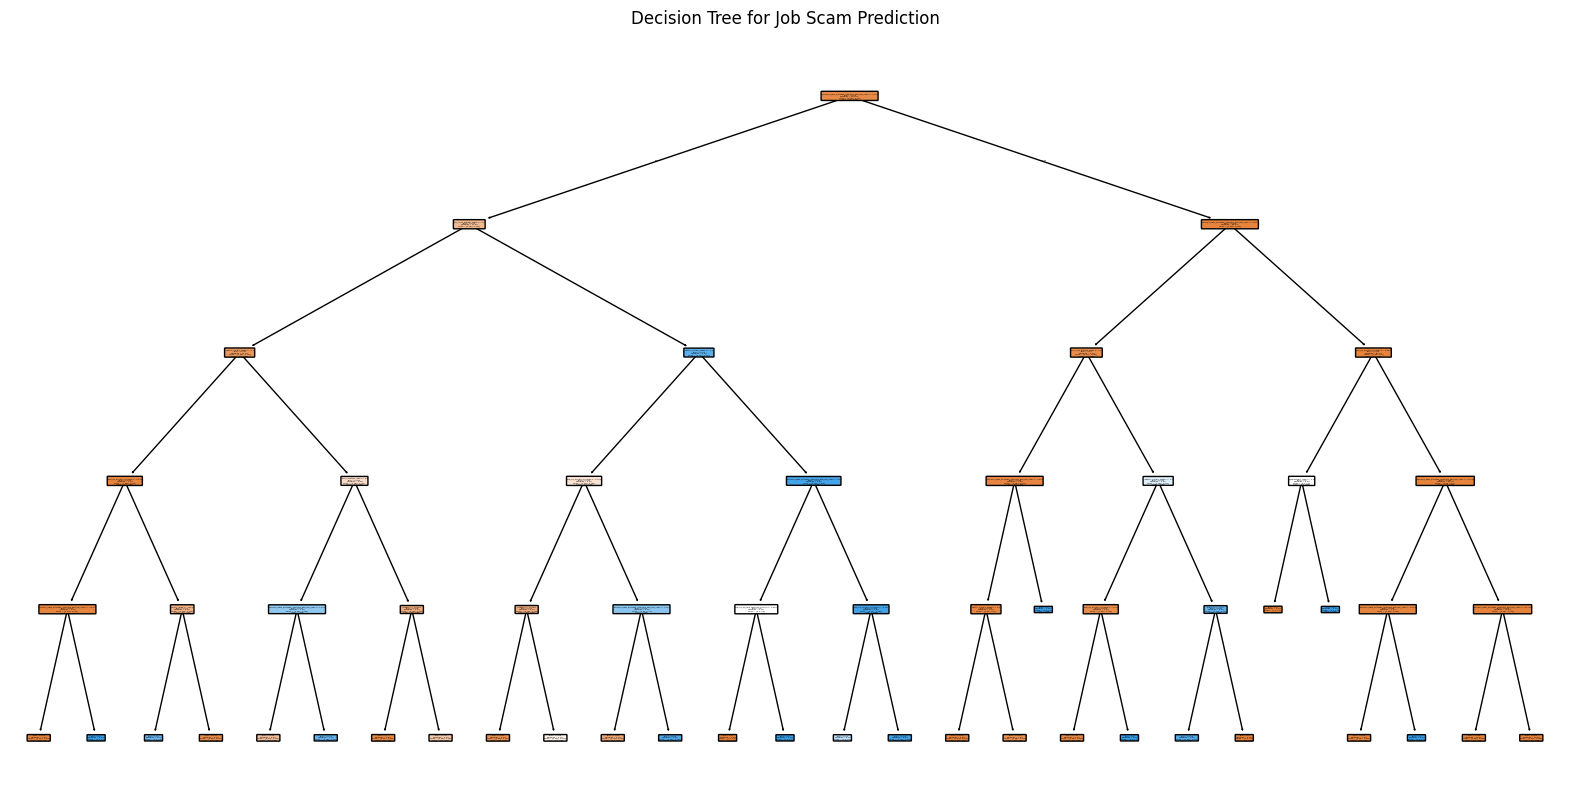


Feature Importance:
                                         Feature  Importance
12                       has_links_without_https    0.401152
14  average_days_between_interview_and_job_offer    0.338639
13                        Identity_details_asked    0.165057
5                               has_company_logo    0.047509
1                                       location    0.017956
16                       avg_no_of_baity_phrases    0.016756
3                                   salary_range    0.004568
15              avg_no_of_time_sensitive_details    0.003629
11                                      function    0.003523
7                                employment_type    0.001210
0                                          title    0.000000
2                                     department    0.000000
4                                  telecommuting    0.000000
8                            required_experience    0.000000
6                                  has_questions    0.000000
9  

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
# Preprocessing
# Handle categorical variables - we'll treat all object/string columns as categorical
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Label encoding for categorical variables
label_encoders = {}
for col in categorical_cols:
    if col in df.columns:
        # Fill missing values with 'Unknown' before encoding
        df[col] = df[col].fillna('Unknown')
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

# Fill remaining numerical NA values with 0 (or you could use mean/median)
df = df.fillna(0)

# Define features and target
X = df.drop('is_scam', axis=1)
y = df['is_scam']

# Split the data into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)  # Limiting depth for interpretability
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the decision tree (might be large)
plt.figure(figsize=(20,10))
tree.plot_tree(dt_model, feature_names=X.columns, class_names=['Not Scam', 'Scam'],
               filled=True, rounded=True, proportion=True)
plt.title("Decision Tree for Job Scam Prediction")
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

cm_dt = confusion_matrix(y_test, y_pred)

Random Forest Model Evaluation:
Accuracy: 0.9674

Confusion Matrix:
[[4941   58]
 [ 117  248]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4999
           1       0.81      0.68      0.74       365

    accuracy                           0.97      5364
   macro avg       0.89      0.83      0.86      5364
weighted avg       0.97      0.97      0.97      5364



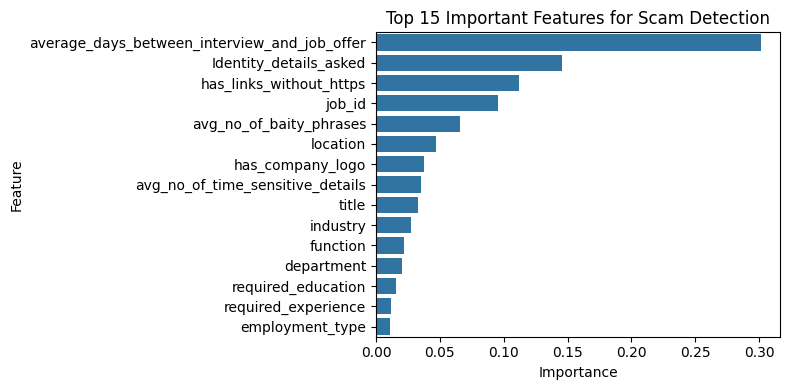

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    max_depth=10,      # Maximum depth of each tree
    min_samples_split=5,  # Minimum samples required to split a node
    random_state=42,
    class_weight='balanced'  # Handles class imbalance if exists
)

rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance Visualization
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Important Features for Scam Detection')
plt.tight_layout()
plt.show()

cm_rf = confusion_matrix(y_test, y_pred)